# Исследование объявлений о продаже квартир

Сервис по недвижимости предоставил свои данные — *архив объявлений о продаже квартир* в Питере и соседних населённых пунктах за несколько лет.
По каждой квартире на продажу доступны два вида данных. Первые вписаны самими пользователями, вторые получены автоматически на основе картографических данных (например, расстояние до ближайшего парка, водоёма, центра и аэропорта). 

## Задача проекта:

Определить рыночную стоимость объектов недвижимости (квартир). Моя задача — установить параметры. Это позволит создать автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

<div class="alert alert-info"> 
<b> Описание данных</b> 
    

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

- `balcony` — число балконов

- `ceiling_height` — высота потолков (м)

- `cityCenters_nearest` — расстояние до центра города (м)

- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

- `first_day_exposition` — дата публикации

- `floor` — этаж

- `floors_total` — всего этажей в доме

- `is_apartment` — апартаменты (булев тип)

- `kitchen_area` — площадь кухни в квадратных метрах (м²)

- `last_price` — цена на момент снятия с публикации

- `living_area` — жилая площадь в квадратных метрах (м²)

- `locality_name` — название населённого пункта

- `open_plan` — свободная планировка (булев тип)

- `parks_around3000` — число парков в радиусе 3 км

- `parks_nearest` — расстояние до ближайшего парка (м)

- `ponds_around3000` — число водоёмов в радиусе 3 км

- `ponds_nearest` — расстояние до ближайшего водоёма (м)

- `rooms` — число комнат

- `studio` — квартира-студия (булев тип)

- `total_area` — площадь квартиры в квадратных метрах (м²)

- `total_images` — число фотографий квартиры в объявлении
</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

In [48]:
# Подключаю необходимые библиотеки для дальнейшего использования
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
#читаю файл csv

data = pd.read_csv('real_estate_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

In [50]:
#смотрю первые 5 строк датафрейма
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


In [51]:
# т.к. данные "склеяны", разделяю их, указав в качестве разделителя знак табуляции \t
data = pd.read_csv('real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [52]:
#смотрю первые 5 строк полученного датафрейма
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

<div class="alert alert-info">
<b> В столбцах `ceiling_height`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `parks_nearest`, `ponds_nearest`, `days_exposition` уже видны пропуски. А в столбце `balcony`, `ponds_around3000` имеются нулевые значения. В столбце `first_day_exposition` хранятся данные о времени. </b>
<br>
</div>


## Предобработка данных

In [53]:
#считаю количество пропусков в столбцах
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [54]:
#создаю переменную, в которую сохраняю все столбцы, в котрых есть пропуски
nan_cols = data.columns[data.isnull().any()]
nan_cols

Index(['ceiling_height', 'floors_total', 'living_area', 'is_apartment',
       'kitchen_area', 'balcony', 'locality_name', 'airports_nearest',
       'cityCenters_nearest', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'days_exposition'],
      dtype='object')

In [55]:
#создаю переменную, в которой сохраняю столбцы с типом object, в которых есть пропуски значений
data_typ_object = ['first_day_exposition', 'is_apartment', 'locality_name']

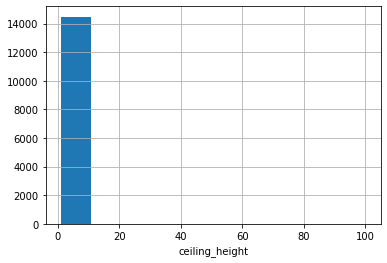

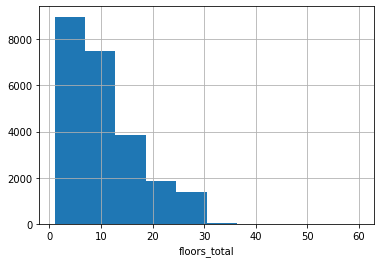

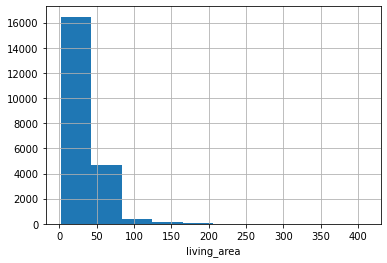

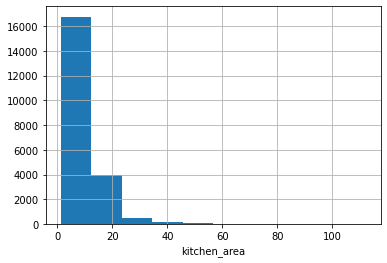

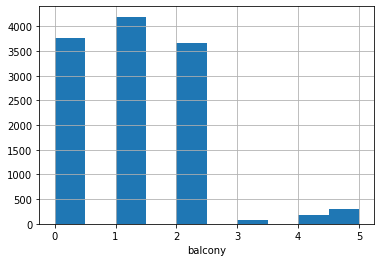

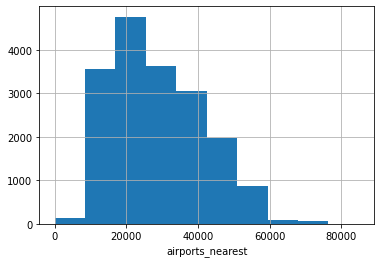

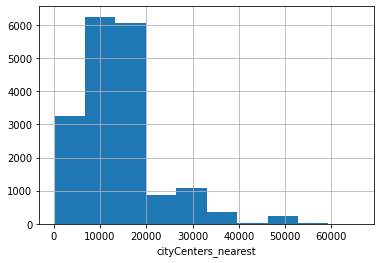

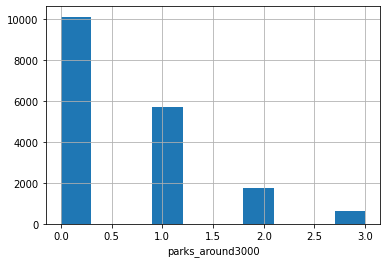

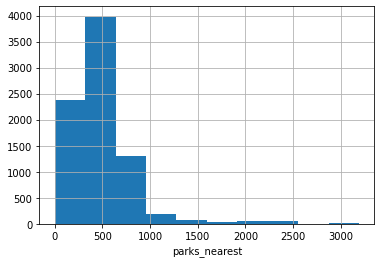

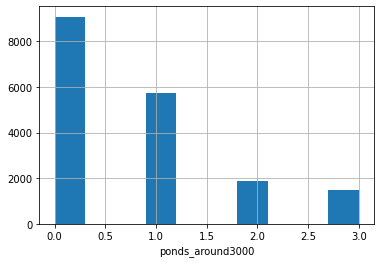

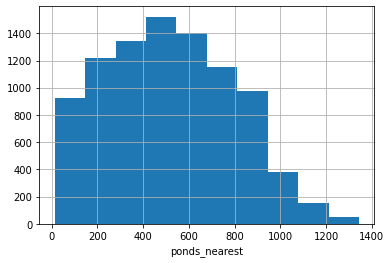

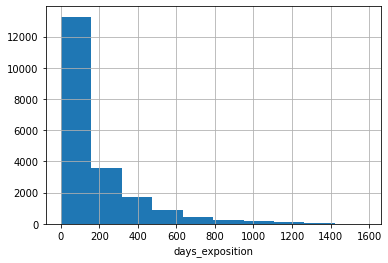

In [56]:
#создаю цикл для столбцов с типом float, в которых визуализирую каждый столбец, 
#не содержащий пропуски с помощью библиотеки matplotlib.pyplot
for col in nan_cols:    
    data_not_na = data.loc[data[col].isna() == False, col]    
    if col not in data_typ_object:
        data_not_na.hist(bins=10)
        plt.xlabel(col)
        plt.show();   
    

In [57]:
#создаю цикл для столбцов с типом object, в которых ищу уникальные значения для каждого столбца, 
#не содержащего пропуски с помощью метода value_counts()
for col in data_typ_object:
    data_not_na = data.loc[data[col].isna() == False, col]
    print()
    print(data_not_na.value_counts())


2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2018-05-20T00:00:00      1
2015-05-15T00:00:00      1
2015-01-12T00:00:00      1
2015-12-19T00:00:00      1
2015-07-19T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64

False    2725
True       50
Name: is_apartment, dtype: int64

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64


<div class="alert alert-info">

<b> Вывод 2.1.
    
В общем и целом понятно, что есть 14 столбцов, содержащих данные с пропусками. Разделяю их на 2 группы: те, в которых пропуски заполнить можно, и те, в которых это не получится сделать.
</b> 


Столбцы, в которых не получится заменить пропуски: 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'. 
Для таких столбцах не получится применить логические методы заполнения данных с пропусками, нужны точные данные, а они просто не указаны, с этим ничего не поделать. Считаю тут неправильным заполнять данные медианным значением.

Столбцы, в которых возможно заполнение пропусков:

- `ceiling_height` - (высота потолков) - можно заполнить наиболее часто стречающимся значением (модой).

- `floors_total` - (количество этажей в доме) - можно заполнить значением моды.

- `living_area` - (жилая площадь) - можно заполнить медианым значением.

- `is_apartment` - если не указан тип жилья, скорее всего это НЕ апартаменты. Заполню пропуски значением False.

- `kitchen_area` - (площадь кухни) - можно заполнить медианым значением.
 
- `balcony` - (количество балконов) - там, где нет информации о количестве балконов, можно предположить, что балконов просто нет, можно заполнить 0.
    
    Ниже заполняю пропуски:
</div>

In [58]:
#вычисляю значение моды высоты потолков, сохраняю в переменную ceiling_jeight_mode, 
#чтобы значение не было типа Series, для удобства сразу меняю тип переменной на float
ceiling_jeight_mode = float(data.ceiling_height.mode())
ceiling_jeight_mode

2.5

In [59]:
#заполняю пропуски в столбце 'ceiling_height' значением моды
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_jeight_mode)

In [60]:
#вычисляю значение моды количества этажей, сохраняю в переменную floors_total_mode, 
#чтобы значение не было типа Series, для удобства сразу меняю тип переменной на float
floors_total_mode = float(data.floors_total.mode())
floors_total_mode

5.0

In [61]:
#заполняю пропуски в столбце 'floors_total' значением моды
data['floors_total'] = data['floors_total'].fillna(floors_total_mode)

In [62]:
#расчитываю долю жилой площади по отношению к общей площади, сохраняю в отдельный столбец living_ratio, 
#далее ищу медиану значений этого столбца, заполняю ей пропуски в столбце living_ratio
#значение столбца total_area умножаю на полученную долю и заполняю ей пропуски в столбце 'living_area'
data['living_ratio'] = data['living_area'] / data['total_area']
living_ratio_median = data['living_ratio'].median()
data.loc[data['living_ratio'].isna() == True, 'living_ratio'] = living_ratio_median
data['living_area'] = data['living_area'].fillna(data['total_area'] * data['living_ratio'])

In [63]:
#расчитываю долю площади кухни по отношению к общей площади, сохраняю в отдельный столбец kitchen_ratio,
#далее ищу медиану значений этого столбца, заполняю ей пропуски в столбце kitchen_ratio
#значение столбца total_area умножаю на полученную долю и заполняю ей пропуски в столбце 'kitchen_area'
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area']
kitchen_ratio_median = data['kitchen_area'].median()
data.loc[data['kitchen_area'].isna() == True, 'kitchen_area'] = kitchen_ratio_median
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * data['kitchen_ratio'])

In [64]:
#заполняю пропуски в столбце 'is_apartment' значением False
data['is_apartment'] = data['is_apartment'].fillna(False)

In [65]:
#заполняю пропуски в столбце 'balcony' значением 0
data['balcony'] = data['balcony'].fillna(0)

<div class="alert alert-info" 
     <b></b></font> Если человек не указал число балконов — скорее всего, их нет. Такие пропуски  заменила на 0. Незаполненные данные по апартаментам считаю не апартаментами, заменяю на значение False.
    <br /> 

In [66]:
#проверяю, не осталось ли пропусков в тех столбцах, где я заполнила пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
living_ratio                0
kitchen_ratio            2278
dtype: int64

In [67]:
#произвожу перевод строки в дату и время в столбце 'first_day_exposition' методом to_datetime(), 
#это пригодиться на этапе исследования статистики по дню недели, месяцу и году публикации объявления 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [68]:
#Выполнила замену данных типа bool на int (для удобства дальнейших рассчетов). Теперь 0 - ложь, 1 - истина.
data[['studio', 'is_apartment', 'open_plan']] = data[['studio', 'is_apartment', 'open_plan']].astype('int')

In [69]:
#проверила данные на наличие явныхсдубликатов. Дубликатов нет.
data.duplicated().sum()

0

## Расчёты и добавление результатов в таблицу

In [70]:
#расчитываю цену квадратного метра:

data['price_per_square_meter'] = data['last_price'] / data['total_area']
data['price_per_square_meter'].astype('int') #меняю тип на целочисленный


0        120370
1         82920
2         92785
3        408176
4        100000
          ...  
23694     72490
23695     52542
23696     44091
23697    149511
23698     41795
Name: price_per_square_meter, Length: 23699, dtype: int32

In [71]:
#рассчитываю день недели, месяц и год публикации объявления, сохраняю в соответвующие столбцы:

data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year # года
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month # месяца
data['weekday_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday # дня

In [72]:
#рассчитываю этаж квартиры; варианты — первый, последний, другой.
#напишем функцию categorizer_floors, чтобы распределить значения по категориям, сохраняю результат в столбец 'floor_category':

def categorizer_floors(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == floors_total:
        return 'last'
    if floor == 1:
        return 'first'
    return 'other'

data['floor_category'] = data.apply(categorizer_floors, axis=1)

In [73]:
#Рассчитываю коэфициент - соотношение жилой площади к общей площади :

data['area_ratio'] = (data['living_area'] / data['total_area']) * 100

In [74]:
#Рассчитываю коэфициент - соотношение площади кухни к общей:

data['kitchen_ratio'] = (data['kitchen_area'] / data['total_area']) * 100

In [75]:
data.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,living_ratio,kitchen_ratio,price_per_square_meter,year_exposition,month_exposition,weekday_exposition,floor_category,area_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,0,...,755.0,NaN,0.472222,23.148148,120370.370370,2019,3,3,other,47.222222
1,7,3350000.0,40.4,2018-12-04,1,2.50,11.0,18.600000,1,0,...,NaN,81.0,0.460396,27.227723,82920.792079,2018,12,1,first,46.039604
2,10,5196000.0,56.0,2015-08-20,2,2.50,5.0,34.300000,4,0,...,574.0,558.0,0.612500,14.821429,92785.714286,2015,8,3,other,61.250000
3,0,64900000.0,159.0,2015-07-24,3,2.50,14.0,90.289724,9,0,...,234.0,424.0,0.567860,5.723270,408176.100629,2015,7,4,other,56.785990
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,0,...,48.0,121.0,0.320000,41.000000,100000.000000,2018,6,1,other,32.000000


Все новые столбцы добавила, данные корректно отображаются.

## Исследовательский анализ данных

<div class="alert alert-info">
<b> 4. 1. Изучение основых параметров</b>
<br> Изучаю следующие параметры: площадь, цена, число комнат, высота потолков. Строю гистограммы для каждого параметра.
</div>


Ниже попробовала сделать графики и гистограммы для каждого столбца с помощью цикла, но это оказалось совсем не наглядно, но я все же решила оставить. Если идея не столь уж плоха и ее можно как-то модифицировать, то будет здорово, если ты подскажешь, как это сделать :)
Ниже я все равно строю гистограммы для каждого столбца в отдельности

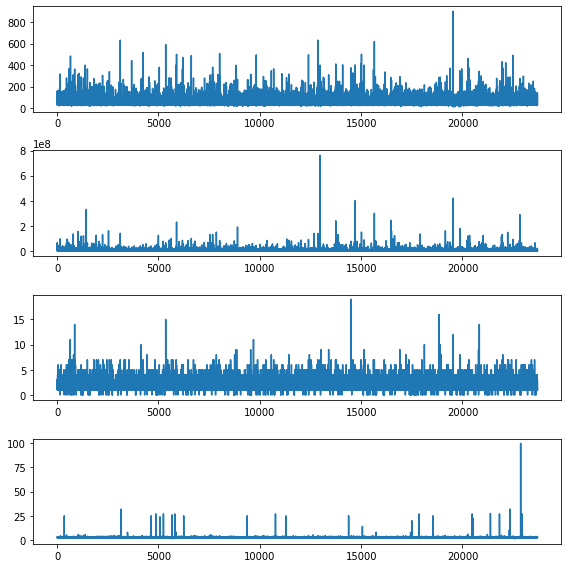

In [76]:
#пишу цикл для построения графиков для каждого столбца

filter_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']  #список столбцов

fig = plt.figure(figsize=(8, 8))
total_axes = len(filter_list) # общее количество графиков (в данном случае
                             # берем равным количеству нужных нам колонок в filter_list
subplt = 1 # номер начального axes
for x in filter_list:
    ax = fig.add_subplot(total_axes, 1, subplt) # добавляем axes для каждого графика
    data[x].plot() #отрисовываем график
    subplt+=1

plt.tight_layout()
plt.show()

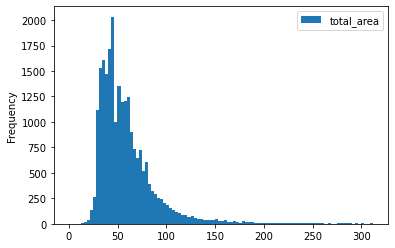

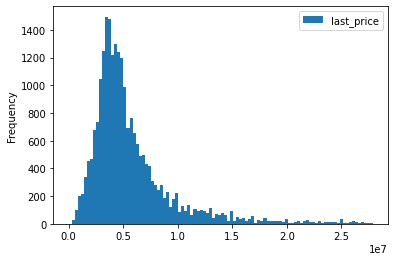

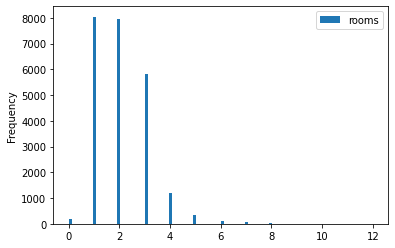

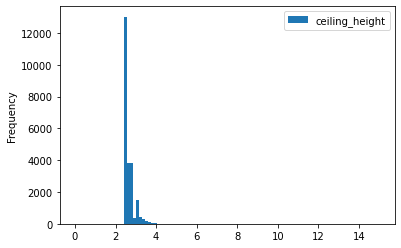

In [77]:
#комментарий ревьюера

filter_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']  #список столбцов

def show_hist(df,column, kind='hist'):
    ax = df.plot(kind=kind,y=column,range = (0,df[x].median()*6),legend=True, bins= 100) #с помощью range() сделал ограничение справа
    plt.show()

for x in filter_list:
    show_hist(data,x)

Строю диаграммы для каждого интересующего столбца отдельно

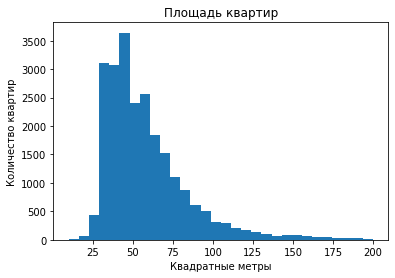

Наибольшие по площади варианты:
19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
5893     500.0
15016    500.0
12401    495.0
Name: total_area, dtype: float64


In [78]:
# Изучаю площадь квартир
plt.hist(data['total_area'], bins=30, range=(10,200))      
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(data['total_area'].sort_values(ascending=False).head(10))

Видно, что пик значений общей площади в районе 45 кв.м. (что похоже на правду). Так же виден длинный "хвост" - выбросы. Есть квартиры с аномально большими площадями.

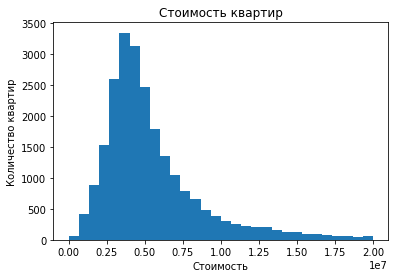

Наибольшие по цене варианты:
12971    763000000.0
19540    420000000.0
14706    401300000.0
1436     330000000.0
15651    300000000.0
22831    289238400.0
16461    245000000.0
13749    240000000.0
5893     230000000.0
8900     190870000.0
Name: last_price, dtype: float64


In [79]:
# Изучаю стоимость квартир
plt.hist(data['last_price'], bins=30, range=(0,20000000))            
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене варианты:')
print(data['last_price'].sort_values(ascending=False).head(10))

В основном стоимость квартир - до 5 миллионов. Квартир стоимостью более 20 миллионов вариантов значительно меньше, а есть единичные варианты на порядок дороже. Так же виден длинный "хвост" - выбросы.

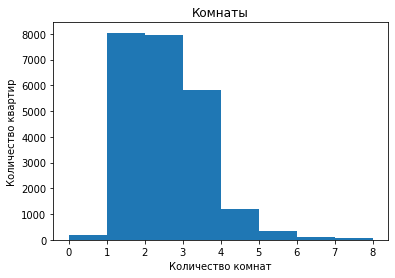

Наибольшие по числу комнат варианты:
14498    19
18848    16
5358     15
20829    14
866      14
19540    12
9688     11
648      11
18119    10
4149     10
Name: rooms, dtype: int64


In [80]:
# Изучаю количество комнат
plt.hist(data['rooms'], bins=8, range=(0, 8))            
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по числу комнат варианты:')
print(data['rooms'].sort_values(ascending=False).head(10))

Чаще всего встречаются одна- и двухкомнатные квартры, реже 3-х комнатные. Варианты с большим количеством квартир очень редки.

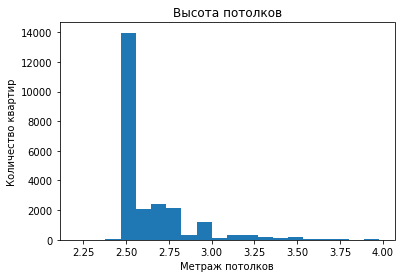

Наибольшие по высоте потолков варианты:
22869    100.0
3148      32.0
22336     32.0
21377     27.5
4876      27.0
17857     27.0
21824     27.0
5246      27.0
20478     27.0
22938     27.0
Name: ceiling_height, dtype: float64


In [81]:
# Изучаю высоту потолков
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)   
plt.title('Высота потолков')
plt.xlabel('Метраж потолков')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по высоте потолков варианты:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))

Видно, что величина потолков чаще всего в районе 2.5 м, значительно реже 2,7м. Есть варианты с очень большой высотой потолков, это выглядит странно.

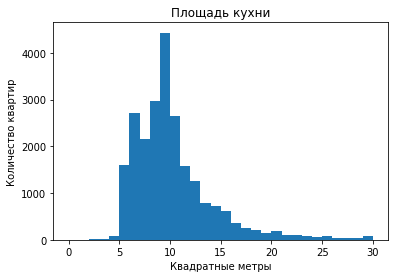

Наибольшие по площади кухни:
19540    112.0
20215    107.0
2489     100.7
5358     100.0
16239     93.2
16797     93.0
10867     87.2
492       77.0
4394      77.0
14644     75.0
Name: kitchen_area, dtype: float64


In [82]:
#Изучаю площадь кухни
plt.hist(data['kitchen_area'], bins=30, range=(0,30))     
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади кухни:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))

Самые распространённые кухни: 5 - 15 кв. метров. Больше 17 кв. метров кухни встречаются реже. Еще больше - единичные случаи. Снова выявлены чрезвычайно большие метражи площади кухни.

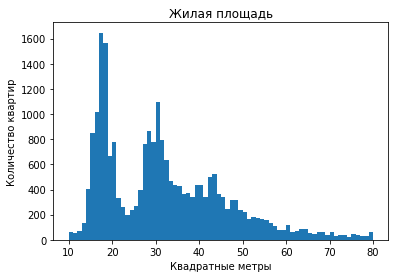

Наибольшие по жилой площади варианты:
19540    409.700000
5358     409.000000
3117     358.319596
12401    347.500000
4237     332.000000
12859    322.300000
660      312.500000
8018     301.500000
14088    300.000000
15016    283.929950
Name: living_area, dtype: float64


In [83]:
# Изучаю жилую площадь
plt.hist(data['living_area'], bins=70, range=(10,80))      
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по жилой площади варианты:')
print(data['living_area'].sort_values(ascending=False).head(10))

Самые распространённые варианты с жилой площадью от 15 до 50 метров. Более 80 метров встречаются единичные случаи. Два пика графика вызваны, вероятно, тем, что это жилые площади для 1-комнатной, затем для 2-комнатной и после - 3-комнатной квартиры.

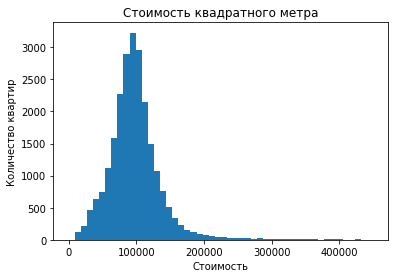

Наибольшие по цене за квадрат варианты:
12971    1907500
1436     1736842
22831    1542604
14706    1000748
4996      995983
16461     857542
4859      848484
17172     848484
16647     841379
17912     813253
Name: price_per_square_meter, dtype: int32


In [84]:
# Изучаю цену за квадратный метр
plt.hist(data['price_per_square_meter'], bins=50, range=(0,450000))       
plt.title('Стоимость квадратного метра')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене за квадрат варианты:')
print(data['price_per_square_meter'].astype('int').sort_values(ascending=False).head(10))

Цена за квадратный метр меет вид напоминающий нормальное распределение с пиком в районе 150,000. Варианты дороже 350,000 -  единичные. Так же есть аномально дорогие вариант с ценой за кв.м.

<div class="alert alert-info">
<b> </b>
<br>Вывод: Чаще всего квартры имеют общую площадь от 25 до 100 кв. м. Квартиры в среднем стоят в среднем около 5 млн. Больше всего 1- и 2-х комнатных квартр. Потолки чаще 2,5-2,7 м. Плозадь кухни в среднем до 15 кв.м. Чаще жилая площадь до 50 кв.м. 1 кв.м. стоит в среднем около 150000.
Есть аномальные высокие показатели у всех параметров исследования. 
</div>

<div class="alert alert-info">
<b>  4.2. Изучение времени продажи квартиры</b>
<br> 
</div>

<div class="alert alert-info">
<b> </b>
<br> 4.2.1. Ищу дату продажи квартир
</div>

Для того, чтобы найти дату продажи квартры, нужно к дню публикации (значения в столбце first_day_exposition) прибавить данные - сколько дней было размещено объявление (от публикации до снятия), они содержатся в столце days_exposition.

In [85]:
#для заполнений столбца 'date_of_sale' (дата продажи), который будет содержать данные о дате продажи квартир пишу функцию date_sale
#использую конструкцию Try-except для обработки 'Nan' значений

def date_sale(row):
    first_day_exposition = row['first_day_exposition']    
    days_exposition = row['days_exposition']    
    try:        
        result = first_day_exposition + pd.Timedelta(days=int(days_exposition))        
        return result
    except ValueError:
        pass

data['date_of_sale'] = data.apply(date_sale, axis=1)

In [86]:
data['date_of_sale'].value_counts()    # Количество продаж в отпределенную дату

2018-01-23    492
2018-03-26    108
2018-09-15    100
2018-12-18     95
2019-04-13     85
             ... 
2017-04-13      1
2016-12-18      1
2017-01-05      1
2016-11-05      1
2016-12-29      1
Name: date_of_sale, Length: 1038, dtype: int64

Наибольшее количество продаж было 23 января 2018 года. Наименьшее количество продаж в Декабре 2016 года.

In [87]:
# добавлю столбец Год продажи - "year_sale"
data['year_sale'] = data['date_of_sale'].dt.year

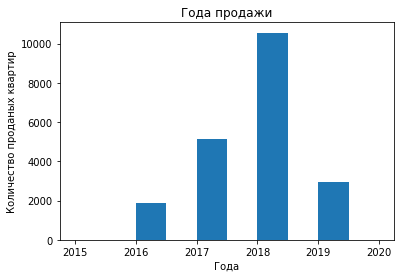

In [88]:
plt.hist(data['year_sale'], bins=10, range=(2015, 2020))      # изучаю жилую площадь
plt.title('Года продажи')
plt.xlabel('Года')
plt.ylabel('Количество проданых квартир')
plt.show()

Видна тенденция увелицения продаж квартир от 2016г к 2018 году. В 2018 году был пик продаж квартир. В 2019 резкий спад.

<div class="alert alert-info">
<b> </b>
<br> 4.2.2. Исследую время продажи квартир
</div>


In [89]:
# Отбрасываем пустые значения и ищем медиану и среднее
print('Время продажи (медиана):', round(data.query('days_exposition.isna() == False', engine='python')['days_exposition'].median()),'\n')
print('Время продажи (среднее):', round(data.query('days_exposition.isna() == False', engine='python')['days_exposition'].mean()),'\n')

Время продажи (медиана): 95 

Время продажи (среднее): 181 



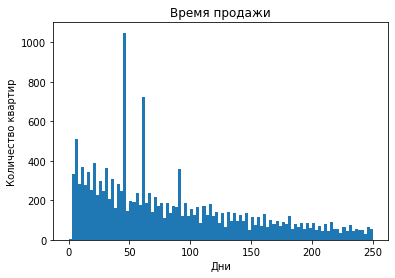

In [90]:
# Гистограма времени продажи
plt.hist(data.query('days_exposition.isna() == False', engine='python')['days_exposition'], bins=100, range=(0,250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

<div class="alert alert-info">
<b> </b>
<br> Время продажи (медиана): 95, время продажи (среднее): 181. В основном квартиры продаются за срок в 90 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.
</div>

In [91]:
# Изучаем значения срока продажи
data.query('days_exposition.isna() == False', engine='python')['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<div class="alert alert-info">
<b> </b>
<br> Быстрой продажей можно назвать срок в 45 дней и меньше. Долгой продажей - 232 дня (232 / 30 = 7,7 месяцев) и дольше.
</div>


<div class="alert alert-info">
<b> 4.3. Убираю редкие и выбивающиеся значения</b>
<br> 
</div>


In [92]:
# Функция для подсчёта границ с учетом 1.5 размаха
def interquartile_range(df, column):    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    IQR = df.loc[(df[column] < Q3 + 1.5*IQR) & (df[column] > Q1 - 1.5*IQR) & (df[column].isna() == False), column]
    return IQR

C:\Users\play_\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


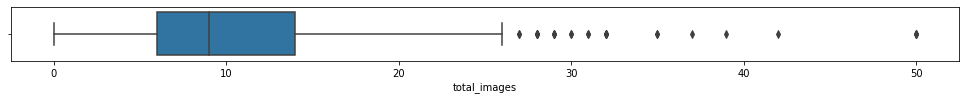

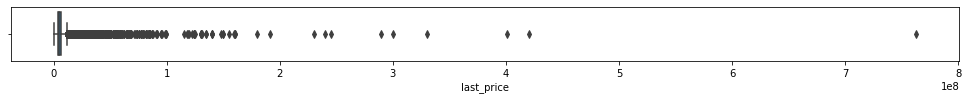

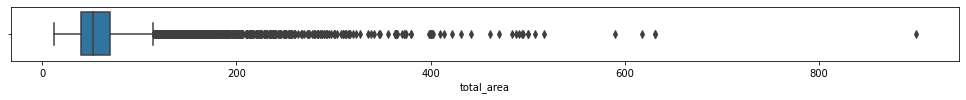

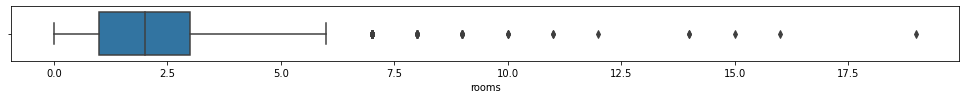

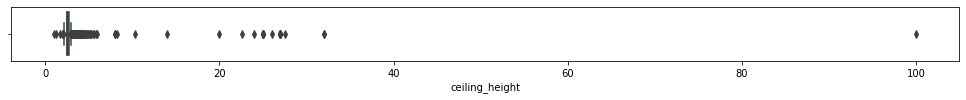

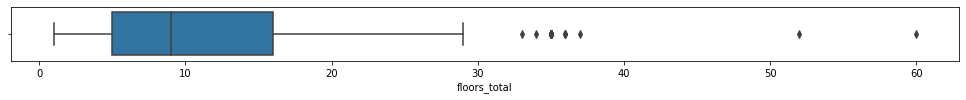

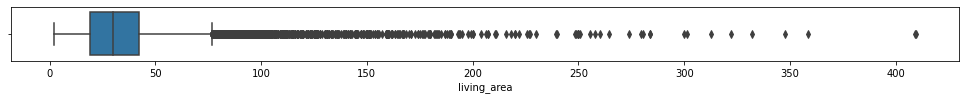

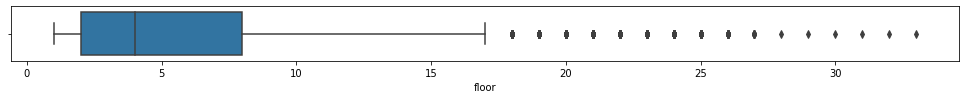

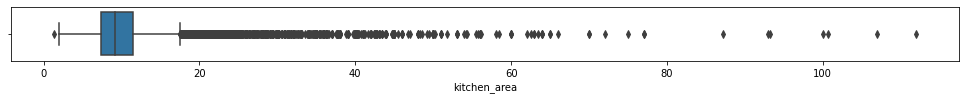

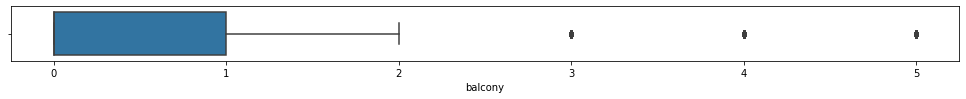

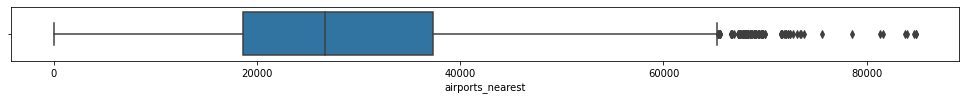

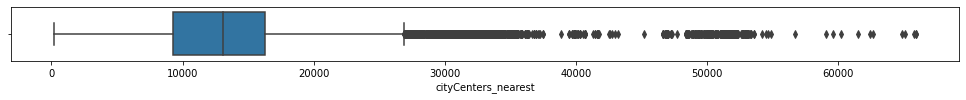

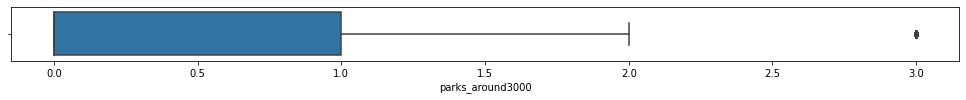

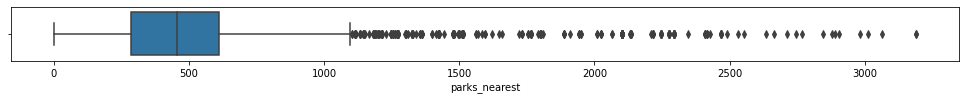

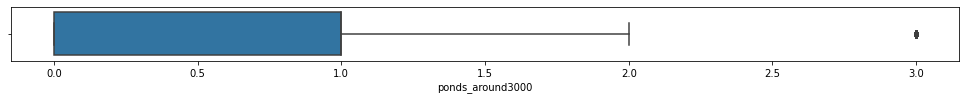

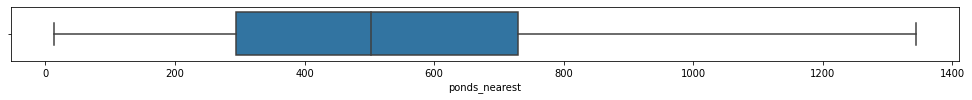

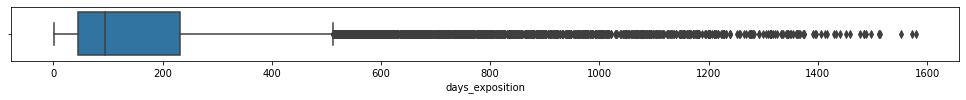

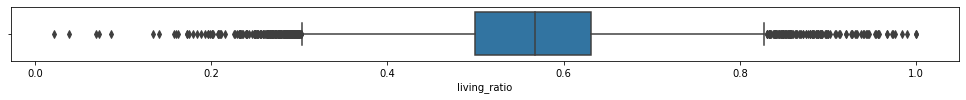

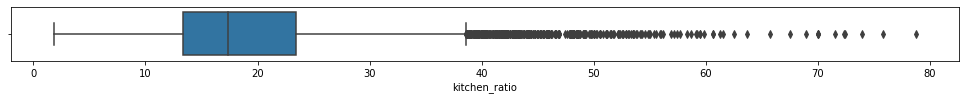

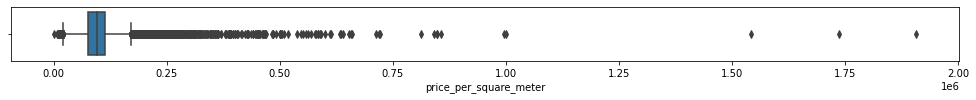

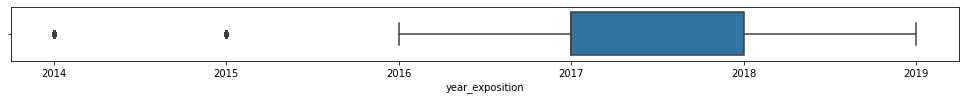

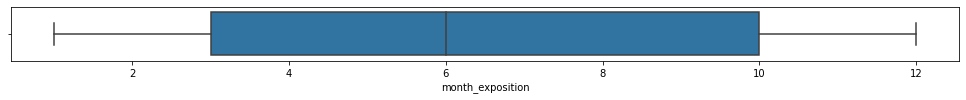

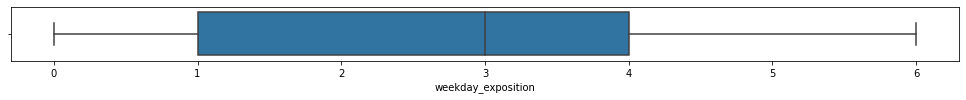

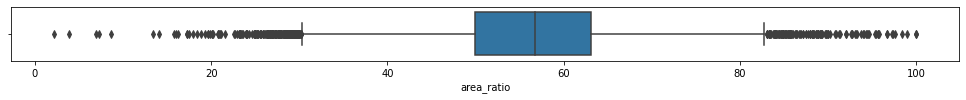

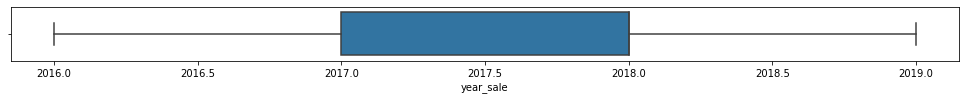

In [93]:
# Строю диаграммы размаха для столбцов data, за исключением столбцов с типом datetime, bool или object
for column in data.drop(
    ['first_day_exposition', 'date_of_sale', 'studio', 'is_apartment', 'open_plan', 'locality_name', 'floor_category'], axis=1).columns:    
        plt.figure(figsize=(17,1))
        sns.boxplot(data=data, x=column)

Из ящика с усами видно, что выбросы чаще всего аномально большие значения. Ниже выделю в отельный список outlier_list столбцы, где видны выбросы.

In [94]:
data.describe()  # смотрю данные описательной статистики

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_nearest,days_exposition,living_ratio,kitchen_ratio,price_per_square_meter,year_exposition,month_exposition,weekday_exposition,area_ratio,year_sale
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,...,9110.000000,20518.000000,23699.000000,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.666160,10.653234,34.578214,5.892358,0.002110,0.006287,...,517.980900,180.888634,0.565014,18.945236,9.942166e+04,2017.367146,6.400101,2.569307,56.501400,2017.712594
std,5.682529,1.088701e+07,35.654083,1.078405,0.995355,6.594024,22.340665,4.885249,0.045885,0.079044,...,277.720643,219.727988,0.101053,7.579882,5.030680e+04,1.039771,3.491561,1.789082,10.105260,0.822805
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,13.000000,1.000000,0.021583,1.820000,1.118349e+02,2014.000000,1.000000,0.000000,2.158273,2016.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,19.000000,2.000000,0.000000,0.000000,...,294.000000,45.000000,0.500000,13.365560,7.658547e+04,2017.000000,3.000000,1.000000,50.000000,2017.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.500000,9.000000,30.000000,4.000000,0.000000,0.000000,...,502.000000,95.000000,0.567860,17.391304,9.500000e+04,2017.000000,6.000000,3.000000,56.785990,2018.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.100000,8.000000,0.000000,0.000000,...,729.000000,232.000000,0.631579,23.461538,1.142563e+05,2018.000000,10.000000,4.000000,63.157895,2018.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,1.000000,1.000000,...,1344.000000,1580.000000,1.000000,78.787879,1.907500e+06,2019.000000,12.000000,6.000000,100.000000,2019.000000


Вызвав data.describe() мы еще наглядней можем увидеть, как отличается сторока 'max' от среднего значения в строке 'mean' во многих столбцах

In [95]:
# Теперь видны столбцы с выбросами, записываю их в список outlier_list
# Применяю функцию interquartile_range к выявленным столбцам для зачитки от выбросов

outlier_list = ['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'kitchen_area', 'balcony',
        'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'days_exposition', 'price_per_square_meter',
       'year_exposition',  'area_ratio', 'kitchen_ratio', 'date_of_sale']
for col in outlier_list:
    data[col] = interquartile_range(data, col)

In [96]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_nearest,days_exposition,living_ratio,kitchen_ratio,price_per_square_meter,year_exposition,month_exposition,weekday_exposition,area_ratio,year_sale
count,23669.000000,2.163800e+04,22459.000000,23504.000000,22156.000000,23667.000000,22812.000000,22550.000000,23699.000000,23699.000000,...,9110.000000,18849.000000,23699.000000,23264.000000,22606.000000,22371.000000,23699.000000,23699.000000,23374.000000,20518.000000
mean,9.829946,4.839970e+06,54.364907,2.030250,2.590474,10.618456,31.521602,5.163503,0.002110,0.006287,...,517.980900,128.753886,0.565014,18.449216,93765.925006,2017.513790,6.400101,2.569307,56.596425,2017.712594
std,5.623709,2.217341e+06,19.385325,0.973667,0.139395,6.527447,13.759063,3.707581,0.045885,0.079044,...,277.720643,121.531193,0.101053,6.652210,28624.823338,0.869503,3.491561,1.789082,9.475336,0.822805
min,0.000000,1.219000e+04,12.000000,0.000000,2.200000,1.000000,2.000000,1.000000,0.000000,0.000000,...,13.000000,1.000000,0.021583,1.820000,20140.105079,2016.000000,1.000000,0.000000,30.271739,2016.000000
25%,6.000000,3.300000e+06,39.400000,1.000000,2.500000,5.000000,18.700000,2.000000,0.000000,0.000000,...,294.000000,41.000000,0.500000,13.333333,76102.457766,2017.000000,3.000000,1.000000,50.305033,2017.000000
50%,9.000000,4.400000e+06,50.100000,2.000000,2.500000,9.000000,30.000000,4.000000,0.000000,0.000000,...,502.000000,85.000000,0.567860,17.209315,93905.764967,2018.000000,6.000000,3.000000,56.785990,2018.000000
75%,14.000000,6.000000e+06,65.600000,3.000000,2.650000,16.000000,40.600000,7.000000,0.000000,0.000000,...,729.000000,183.000000,0.631579,23.035916,111414.904705,2018.000000,10.000000,4.000000,63.095238,2018.000000
max,25.000000,1.189440e+07,114.600000,5.000000,3.000000,29.000000,76.717872,16.000000,1.000000,1.000000,...,1344.000000,512.000000,1.000000,38.596491,170731.707317,2019.000000,12.000000,6.000000,82.758621,2019.000000


<div class="alert alert-info">
<b> </b>
<br> Теперь вызвав data.describe() мы видим, что сторока max уже не сильно отличается от среднего значения в строке mean во многих столбцах. Можно сделать вывод, что мы убрали редкие и выбивающиеся значения. Данные стали более реалистичные, а значит более чистые.
</div>

<div class="alert alert-info">
<b> 4.4. Изучаю, какие факторы больше всего влияют на стоимость квартиры.</b>
<br> 
</div>

Для изучения этого вопроса я построю матрицу корреляции.

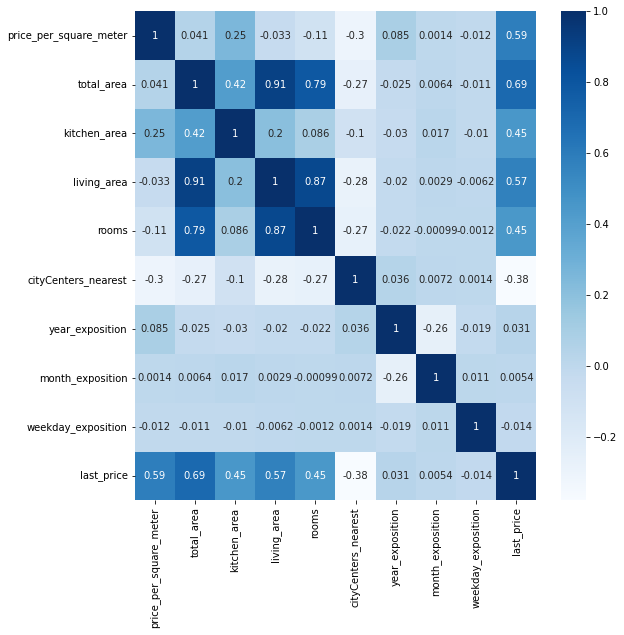

In [97]:
corr = data[['price_per_square_meter', 'total_area', 'kitchen_area', 'living_area', 'rooms', 'cityCenters_nearest', 'year_exposition', 'month_exposition', 'weekday_exposition', 'last_price']].corr()
plt.figure(figsize=(9, 9))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
           cmap="Blues", annot=True);

In [98]:
# комментарий ревьюера

corr  = data.corr()\
        .sort_values('last_price', ascending=False)\
        .filter(items = ['last_price'])\
        .reset_index()
corr.style.background_gradient('coolwarm')

,index,last_price
0,last_price,1.000000
1,total_area,0.693864
2,price_per_square_meter,0.588820
3,living_area,0.574078
4,kitchen_area,0.452108
5,rooms,0.449248
6,ceiling_height,0.282426
7,floors_total,0.183182
8,total_images,0.153884
9,ponds_around3000,0.144586


Видно, что чем темнее окрашено, тем больше параметры коррелируют (зависят) между собой. Можно сделать вывод, что цена ('last_price') наиболее сильно зависит от общей площади квартиры (если брать вглубь, то цена чуть больше зависит от жилой площади, нежели от площади кухни). От количества комнат и цены за квадратный метр цена зависит не сильно. От удаленности от центра вообще видна низкая корреляция. Зависимость от даты размещения: очень низкая зависимость, чуть больше она зависит от года размещения, самая низкая зависимость от дня. 


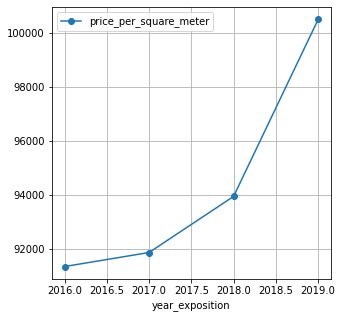

In [99]:
data.pivot_table(index='year_exposition', values='price_per_square_meter').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

Зависимость цены от года: квартиры только дорожают. Резки рост цены после 2018 года.

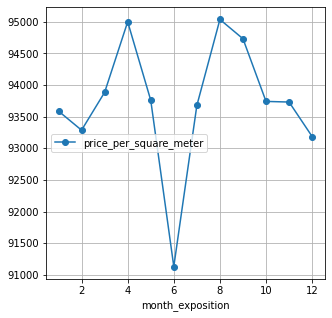

In [100]:
data.pivot_table(index='month_exposition', values='price_per_square_meter').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

Зависимость цены от месяца: дороже всего квартиры, продающиеся в апреле и сентябре, дешевле всего - в июне.

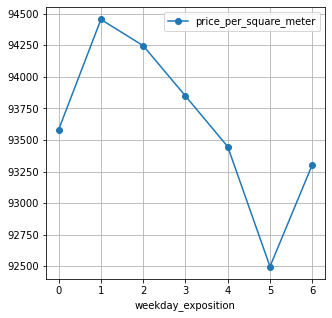

In [101]:
data.pivot_table(index='weekday_exposition', values='price_per_square_meter').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

Зависимость цены от дня недели: дороже всего квартиры, опубликованные во вторник, дешевле всего - в субботу.

Для изучения зависимости цены от этажа, группирую данные и смотрю медиану.

In [102]:
floor_group_median = data.groupby('floor_category', as_index=False)['last_price'].median()
floor_group_median

,floor_category,last_price
0,first,3825000.0
1,last,4000000.0
2,other,4595000.0


Таким образом, я выяснила, что самая низкая стоимость квартир на первом этаже, самая высокая у квартир не на первом, не на последнем этаже.

Я пошла дальше, чтобы выяснить, на каких этажах самые дорогие квартиры. Ниже произвожу группировку

In [103]:
other_floor_median = data.loc[data['floor_category'] == 'other'].groupby(['floor_category','floor'], as_index=False)['last_price'].median()
other_floor_median

,floor_category,floor,last_price
0,other,2.0,4300000.0
1,other,3.0,4350000.0
2,other,4.0,4290000.0
3,other,5.0,4800000.0
4,other,6.0,4740000.0
5,other,7.0,4680000.0
6,other,8.0,4680000.0
7,other,9.0,4900000.0
8,other,10.0,4800000.0
9,other,11.0,4950000.0


Отчетливо видна закономерность у квартир, находящихся не на первом, не на последнем этаже - чем выше этаж, тем дороже стоимость. Самая дорогая квартира стоит 5 млн и находится на 13 этаже.

<div class="alert alert-info">
<b> </b>
<br> Вывод: цена наиболее сильно зависит от общей площади квартиры. В 2019 году цены заметно подорожали. Самая дорогая цена в апреле и сентябре, наиболее низкая - в июне. Дороже всего квартиры, опубликованные в понедельник, дешевле всего - в пятницу. 
Самая низкая стоимость квартир на первом этаже, самая высокая у квартир не на первом, не на последнем этаже. Кроме того, чем выше этаж, тем дороже стоимость. Самая дорогая квартира стоит 5 млн и находится на 13 этаже.
</div>

<div class="alert alert-info">
<b> 4.5. Выбираю 10 населённых пунктов с наибольшим числом объявлений и изучаю их.</b>
<br> 
</div>


In [104]:
# Ищу 10 населенных пунктов с наибольшим числом объявлений
ten_city = data['locality_name'].value_counts().head(10)
ten_city

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [105]:
# Сравниваем среднюю стоимость квадратного метра в топ-10 городов по числу объявлений
city_price_per_square_meter = data.query('locality_name in (@ten_city.index)', engine='python').pivot_table(values='price_per_square_meter',index='locality_name')
city_price_per_square_meter.sort_values('price_per_square_meter', ascending=False) 

,price_per_square_meter
locality_name,
Санкт-Петербург,106353.163098
Пушкин,102148.206600
деревня Кудрово,92473.547576
посёлок Парголово,90175.913458
посёлок Мурино,85752.189195
посёлок Шушары,78677.364217
Колпино,75424.579098
Гатчина,69294.601730
Всеволожск,67214.252635


<div class="alert alert-info">
<b> </b>
<br> Наибольшая средняя стоимость квадратного метра в городе Санкт-Петербург (ожидаемо). После - Пушкин, который находится не так далеко от СПб, исторический город с красивыми парками и ожидаемо высокими ценами. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкающие. Из топ-10 наименьшая стоимость во Всеволожске и Гатчине, из которых далеко и не всегда удобно ехать до Санкт-Петербурга, а также Выборг, расположенный на большем расстоянии от Санкт-Петербурга.
</div>

<div class="alert alert-info">
<b> 4.6. Изучаю, как цена зависит от удалённости от центра. Определяем границу центральной зоны.</b>
<br> 
</div>

In [106]:
# Добавляем столбец с расстоянием до центра в км, округляем до целого
data['center_km'] = data['cityCenters_nearest'] / 1000
data['center_km'] = data['center_km'].fillna(value=0).astype(int)

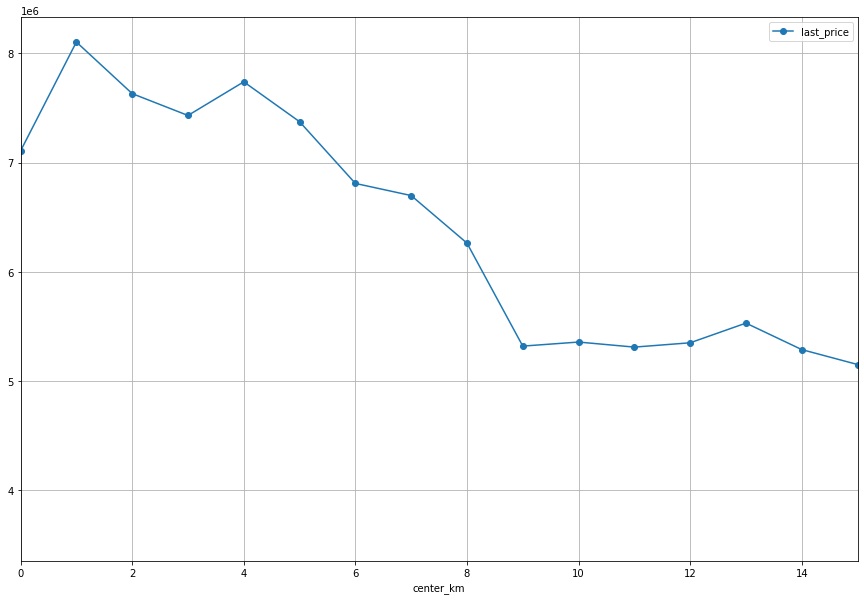

In [107]:
# Выбираем только Санкт-Петербург, смотрим на график, где указана средняя стоимость для каждого км

data.query('locality_name == "Санкт-Петербург"', engine='python').pivot_table(index='center_km', values='last_price').plot(grid=True, style='o-', xlim=(0,15), figsize=(15, 10))
plt.show()

<div class="alert alert-info">
<b></b>
<br> Делаю вывод: центральная зона - до 7 км. Дальше 7 км средняя цена на квартиры резко снижается.
</div>

<div class="alert alert-info">
<b> 4.7. Анализирую территорию центральной зоны и изучаю основные параметры.</b>
<br> 
</div>

In [109]:
# Выделяем сегмент центра города
center_spb = data.query('(locality_name == "Санкт-Петербург") & (center_km <= 7)', engine='python') 

Для того, чтобы посмотреть, какие факторы больше всего влияют на стоимость квартиры в центре СПб строю матрицу корреляции.


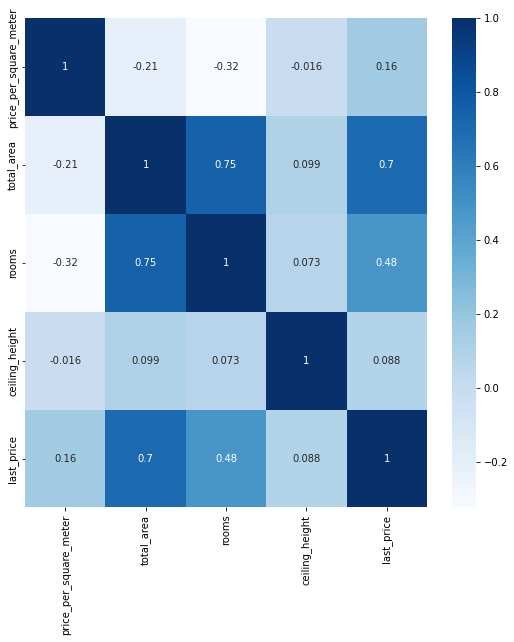

In [110]:
corr = center_spb[['price_per_square_meter', 'total_area', 'rooms', 'ceiling_height', 'last_price']].corr()
plt.figure(figsize=(9, 9))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
           cmap="Blues", annot=True);

Цена в центре сильно зависит от площади квартиры, меньше от числа комнат. Очень слабо зависит от высоты потолков.

Разберемся подробнее:

Площадь (медиана): 52 

Площадь в центре (медиана): 68 

Площадь (среднее): 57 

Площадь в центре (среднее): 69 



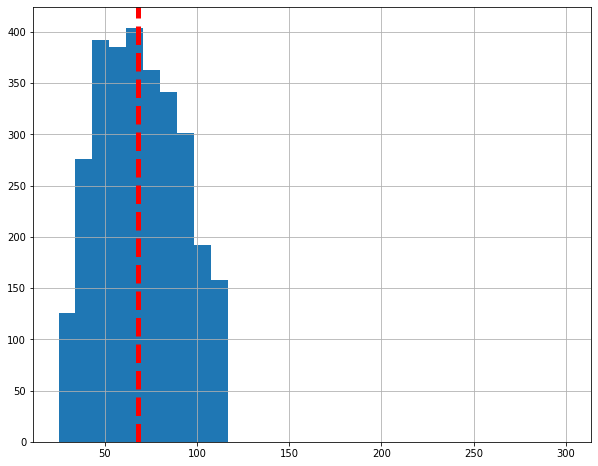

In [111]:
# Изучаем зависимость цены от площади

print('Площадь (медиана):', round(data.query('locality_name == "Санкт-Петербург"', engine='python')['total_area'].median()),'\n')
print('Площадь в центре (медиана):', round(center_spb['total_area'].median()),'\n')
print('Площадь (среднее):', round(data.query('locality_name == "Санкт-Петербург"', engine='python')['total_area'].mean()),'\n')
print('Площадь в центре (среднее):', round(center_spb['total_area'].mean()),'\n')
center_spb['total_area'].hist(bins=30, range=(25,300), figsize=(10, 8))
plt.axvline(round(center_spb['total_area'].median()), color='r', linestyle='dashed', linewidth=5)
plt.show()

Площадь квартир в центре значительно больше, чем в целом по городу - в среднем на 13-14 метров. Также в центре находится достаточно много квартир с большой площадью (100 кв.м.и больше).

Цена (медиана): 5150000 

Цена в центре (медиана): 7290000 

Цена (среднее): 5663713 

Цена в центре (среднее): 7359297 



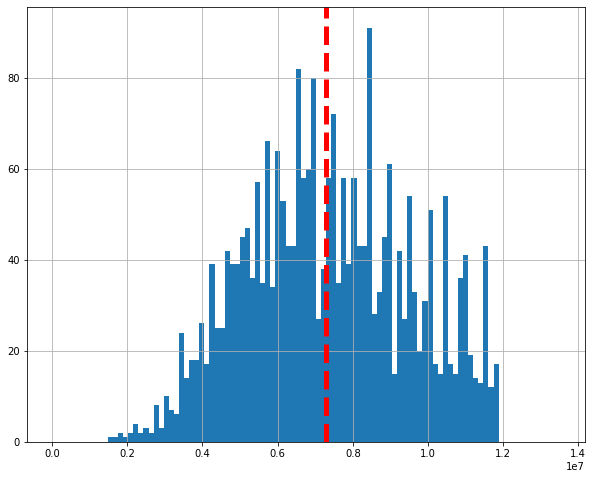

In [112]:
# Изучаю цену в центре СПб
print('Цена (медиана):', round(data.query('locality_name == "Санкт-Петербург"', engine='python')['last_price'].median()),'\n')
print('Цена в центре (медиана):', round(center_spb['last_price'].median()),'\n')
print('Цена (среднее):', round(data.query('locality_name == "Санкт-Петербург"', engine='python')['last_price'].mean()),'\n')
print('Цена в центре (среднее):', round(center_spb['last_price'].mean()),'\n')
center_spb['last_price'].hist(bins=100, range=(0, 13500000), figsize=(10, 8))
plt.axvline(round(center_spb['last_price'].median()), color='r', linestyle='dashed', linewidth=5)
plt.show()

Цена на квартиры в центре выше. Квартир дороже 12 млн нет.

In [113]:
# Изучаем количество комнат в квартире в центре СПб
spb_rooms = data.query('(locality_name == "Санкт-Петербург") & (rooms > 0)', engine='python').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms.columns = ['count']
spb_rooms['rooms_ratio'] = spb_rooms['count'] / spb_rooms['count'].sum() * 100
spb_rooms_center = center_spb.pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms_center.columns = ['center_count']
spb_rooms_center['center_rooms_ratio'] = spb_rooms_center['center_count'] / spb_rooms_center['center_count'].sum() * 100
rooms_alldata = pd.merge(spb_rooms, spb_rooms_center, 'left', on = 'rooms')
rooms_alldata['center_cap'] = round(rooms_alldata['center_count'] / rooms_alldata['count'] * 100)
display(rooms_alldata)

,count,rooms_ratio,center_count,center_rooms_ratio,center_cap
rooms,,,,,
1.0,4584,31.273025,580,16.183036,13.0
2.0,4874,33.251467,1113,31.054688,23.0
3.0,3976,27.125119,1152,32.142857,29.0
4.0,941,6.419703,502,14.006696,53.0
5.0,283,1.930686,219,6.110491,77.0


В центре в два раза ниже доля однокомнатных квартир (16 %), чем в среднем по городу (31 %). Половина четырёхкомнатных квартир находится в центре города (52 %), их доля в два раза больше, чем в среднем по городу (6 %). Большинство квартир с 5 комнатами и более находятся в центре города.

In [114]:
# Изучаем высоту потолков в центре СПб
print('Высота потолков (медиана):', data.query('locality_name == "Санкт-Петербург"', engine='python')['ceiling_height'].median(),'\n')
print('Высота потолков в центре (медиана):', center_spb['ceiling_height'].median(),'\n')
print('Высота потолков (среднее):', data.query('locality_name == "Санкт-Петербург"', engine='python')['ceiling_height'].mean(),'\n')
print('Высота потолков в центре (среднее):', center_spb['ceiling_height'].mean(),'\n')

Высота потолков (медиана): 2.5 

Высота потолков в центре (медиана): 2.5 

Высота потолков (среднее): 2.603807627828982 

Высота потолков в центре (среднее): 2.659042433345853 



Высота потолков в центре выше в среднем на 5 сантиметров. По значению медианы - идентично что и по городу.

<div class="alert alert-info">
<b> </b>
<br> Цена в центре сильно зависит от площади квартиры, меньше от числа комнат. Площадь квартир в центре значительно больше, чем в целом по городу - в среднем на 13-14 метров. Также в центре находится достаточно много квартир с большой площадью (100 кв.м.и больше). Цена на квартиры в центре выше. Квартир дороже 12 млн нет. В центре в два раза ниже доля однокомнатных квартир (16 %), чем в среднем по городу (31 %). Половина четырёхкомнатных квартир находится в центре города (52 %), их доля в два раза больше, чем в среднем по городу (6 %). Большинство квартир с 5 комнатами и более находятся в центре города. Высота потолков в центре выше в среднем на 5 сантиметров.
</div>

<div class="alert alert-info">
<b> 4.8. Выделяю факторы, которые влияют на стоимость квартиры в центре (число комнат, этаж, удалённость от центра, дата размещения объявления).</b>
<br> 
</div>

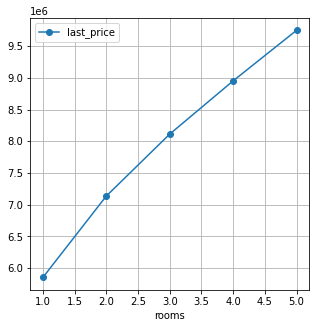

Корреляция цены и числа комнат: 

            last_price     rooms
last_price    1.000000  0.111356
rooms         0.111356  1.000000 



In [115]:
# Зависимость цены в центре СПб от числа комнат
center_spb.query('(rooms > 0) & (rooms < 10)', engine='python').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(center_spb.query('(rooms > 0) & (rooms < 10)', engine='python').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')


Зависимость цены квартиры от числа комнат в центре такая же, как и в целом по городу.

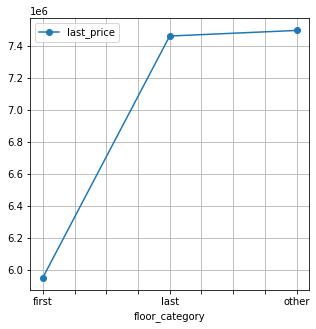

In [116]:
# Зависимость цены в центре СПб от этажа
center_spb.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

Зависимость цены квартир в центре точно такая же как и по городу в целом. Не первый и не последний этаж стоит дороже. Хотя можно отметить, что последний этаж не столь уж сильно отличается ценой от квартир на не первом этаже.

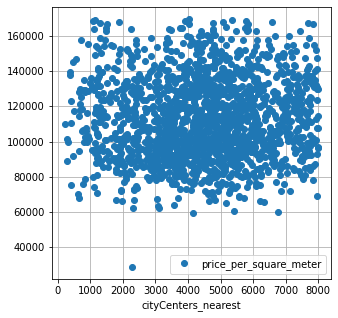

Корреляция цены и удалённости от центра: 

                     cityCenters_nearest  last_price
cityCenters_nearest             1.000000    0.433061
last_price                      0.433061    1.000000 



In [117]:
# Зависимость цены в центре СПб от удалённости от центра
center_spb.pivot_table(index='cityCenters_nearest', values='price_per_square_meter', aggfunc='median').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(center_spb.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr(),'\n')

В центральной зоне видна слабая зависимость от удалённости от центра города. 

Зависимость цены от дата размещения объявления:

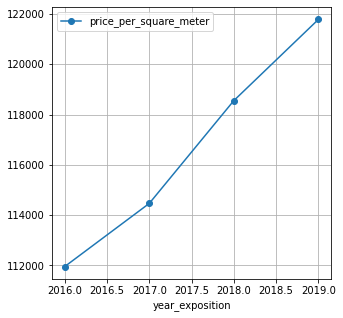

In [118]:
# Зависимость цены в центре СПб от года размещения объявления
center_spb.pivot_table(index='year_exposition', values='price_per_square_meter').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

Цены на квартры в центре с годами только растут. Такая же тенденция в целом по городу.

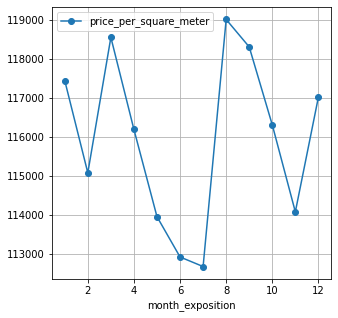

In [119]:
# Зависимость цены в центре СПб от месяца размещения объявления
center_spb.pivot_table(index='month_exposition', values='price_per_square_meter').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

После марта цена снижается, минимум цена в июне-июле, к августу резкий рост цены, к ноябрю снова резкий спад. Такая же тенденция в целом по городу.

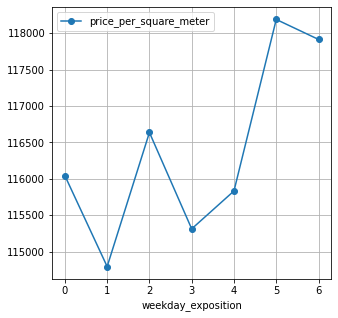

In [120]:
# Зависимость цены в центре СПб от дня недели размещения объявления
center_spb.pivot_table(index='weekday_exposition', values='price_per_square_meter').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

В субботу самы дорогие квартиры. Во вторник самые дешевые.

<div class="alert alert-info">
<b></b>
<br> Зависимость цены квартиры от числа комнат в центре такая же, как и в целом по городу. В центральной зоне видна слабая зависимость от удалённости от центра города. Цены на квартиры с годами только расут. После марта цена снижается, минимум цена в июне-июле, к августу резкий рост цены, к ноябрю снова резкий спад. Рост цены в субботу, спад ко вторнику. Такая же тенденция в целом по городу. 
</div>

<div class="alert alert-info">
<b> Общий вывод по проекту. </b>
<br> 
    
- Срок продажи квартиры
    
Чаще всего квартиры продают за 95 дней. Если срок продажи меньше 45 дней, то это быстро, если дольше 232 дней (7 месяцев) - это долго.
Есть большое число квартир, проданных всего за несколько дней после публикации.
Также есть варианты, которые продавались несколько десятков месяцев.
    
    
- Факторы, влияющие на стоимость

На стоимость больше влияет площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.
Первый и послднй этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.
    
- Стоимость квадратного метра в топ-10 населённых пунктов

Дороже всего квадратный метр в Санкт-Петербурге - 106353, в Пушкине - 102148.

- Факторы, влияющие на стоимость в центре Санкт-Петербурга

В центре города почти нет разницы, насколько квартира удалена от условного центра города.
В центре города последний этаж практически не влияет на стоимость квартиры, в отличие от остального города.
В центре есть очень дорогие однокомнатные квартиры. Возможно связано с тем, что в центре недвижимость элитнее.
</div>